# Personal Information
Name: **DIMITRIOS TSIAMOURAS**

StudentID: **14896184**

Email: [**dimitrios.tsiamouras@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **20.03.2024**

# Data Context
**In this section you should introduce the datasources and datasets which you will be working with. Explain where they are from as well as their domain. Give an overview of what the context of the data is. You should not spend more than 1 to 2 paragraphs here as the core information will be in the next section.**

# Data Description

**Present here the results of your exploratory data analysis. Note that there is no need to have a "story line" - it is more important that you show your understanding of the data and the methods that you will be using in your experiments (i.e. your methodology).**

**As an example, you could show data, label, or group balances, skewness, and basic characterizations of the data. Information about data frequency and distributions as well as results from reduction mechanisms such as PCA could be useful. Furthermore, indicate outliers and how/why you are taking them out of your samples, if you do so.**

**The idea is, that you conduct this analysis to a) understand the data better but b) also to verify the shapes of the distributions and whether they meet the assumptions of the methods that you will attempt to use. Finally, make good use of images, diagrams, and tables to showcase what information you have extracted from your data.**

As you can see, you are in a jupyter notebook environment here. This means that you should focus little on writing text and more on actually exploring your data. If you need to, you can use the amsmath environment in-line: $e=mc^2$ or also in separate equations such as here:

\begin{equation}
    e=mc^2 \mathrm{\space where \space} e,m,c\in \mathbb{R}
\end{equation}

Furthermore, you can insert images such as your data aggregation diagrams like this:

![image](example.png)

### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Input, LSTM, Dropout# Imports
import os
import re
from pandas.plotting import scatter_matrix
import random

### - Dataset 1: PAMAP2

In [4]:
#functions to load 

#3-axial sensors
def generate_three_IMU(name):    
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    return [x,y,z]

#4-axial sensors
def generate_four_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    w = name +'_w'
    return [x,y,z,w]

def generate_cols_IMU(name):
    temp = name+'_temperature'
    output = [temp]
    
    acc_16 = name+'_3D_acceleration_16'
    acc_16 = generate_three_IMU(acc_16)
    output.extend(acc_16)
    
    acc_6 = name+'_3D_acceleration_6'
    acc_6 = generate_three_IMU(acc_6)
    output.extend(acc_6)

    gyro = name+'_3D_gyroscope'
    gyro = generate_three_IMU(gyro)
    output.extend(gyro)

    magn = name+'_3D_magnetometer'
    magn = generate_three_IMU(magn)
    output.extend(magn)
    
    orien = name+'_4D_orientation'
    orien = generate_four_IMU(orien)
    output.extend(orien)
    return output

def load_IMU():
    output = ['time_stamp', 'activity_id', 'heart_rate']
    hand = 'hand'
    hand = generate_cols_IMU(hand)
    output.extend(hand)
    chest = 'chest'
    chest = generate_cols_IMU(chest)
    output.extend(chest)
    ankle = 'ankle'
    ankle = generate_cols_IMU(ankle)
    output.extend(ankle)
    return output
    
def load_subjects(root='../pamap2+physical+activity+monitoring/PAMAP2_Dataset/PAMAP2_Dataset/Protocol/subject'):
    output = pd.DataFrame()
    cols = load_IMU()
    
    for i in range(101,110): #110
        path = root + str(i) +'.dat'
        subject = pd.read_table(path, header=None, sep='\s+')
        subject.columns = cols 
        subject['subject_id'] = i
        output = pd.concat([output, subject], ignore_index=True)
    output.reset_index(drop=True, inplace=True)
    return output

data = load_subjects()

In [5]:
#data.info()
data.head(5)

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,101
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,101
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,101
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,101
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,101


### Preprocess data by:
1) Removing the "Orientation" columns (described as invalid in the Readme)

In [6]:
data = data.drop(['hand_4D_orientation_x', 'hand_4D_orientation_y', 
                  'hand_4D_orientation_z', 'hand_4D_orientation_w',
                'chest_4D_orientation_x', 'chest_4D_orientation_y', 
                  'chest_4D_orientation_z', 'chest_4D_orientation_w',
                'ankle_4D_orientation_x', 'ankle_4D_orientation_y', 
                  'ankle_4D_orientation_z', 'ankle_4D_orientation_w'],
        axis = 1) 

2) Removing activity_id 0
3) Fill NaN heartrate with column mean

In [7]:
def fix_data(data):
    data = data.drop(data[data['activity_id']==0].index)
    data = data.interpolate()
    for colName in data.columns:
        data[colName] = data[colName].fillna(data[colName].mean())
    activity_mean = data.groupby(['activity_id']).mean().reset_index()
    return data

df_pamap = fix_data(data)
df_pamap

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_acceleration_6_x,ankle_3D_acceleration_6_y,ankle_3D_acceleration_6_z,ankle_3D_gyroscope_x,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,id
2928,37.66,1,107.487925,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.863600,-58.369600,101
2929,37.67,1,107.487925,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.319700,-58.365600,101
2930,37.68,1,107.487925,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900,101
2931,37.69,1,107.487925,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.102800,-57.879900,101
2932,37.70,1,100.000000,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872015,95.06,24,162.000000,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,...,9.41274,-2.26922,-1.759580,0.021288,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,109
2872016,95.07,24,162.000000,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,...,9.33733,-2.23908,-1.834950,0.010715,0.003629,-0.004235,-46.0331,-0.817288,0.538134,109
2872017,95.08,24,162.000000,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,...,9.32243,-2.23905,-1.804610,-0.016939,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,109
2872018,95.09,24,162.000000,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,...,9.38220,-2.26938,-1.880500,-0.028069,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,109


#### Some Dataset stats

In [8]:
print('Df shape', df_pamap.shape)
print('Total columns', len(df_pamap.columns))
print('No of subjects', len(df_pamap.groupby(['id']).mean().reset_index()))
print('No of total activities',len(df_pamap.groupby(['activity_id']).mean().reset_index()))

Df shape (1942872, 43)
Total columns 43
No of subjects 9
No of total activities 12


#### Subject distribution - can be used in Data Segmentation/Hypotheses etc

In [9]:
#function to facilitate fast plots

def pd_fast_plot(pd,column_a,column_b,title, figsize=(10,6)):
    plt.rcParams.update({'font.size': 16})
    size = range(len(pd))
    f, ax = plt.subplots(figsize=figsize) 
    plt.bar(size, pd[column_a], color=plt.cm.Paired(size))
    a = ax.set_xticklabels(pd[column_b])
    b = ax.legend(fontsize = 20)
    c = ax.set_xticks(np.arange(len(pd)))
    d = ax.set_title(title)
    plt.show()

C:\Users\dimts\AppData\Local\Temp\ipykernel_12312\1872883728.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


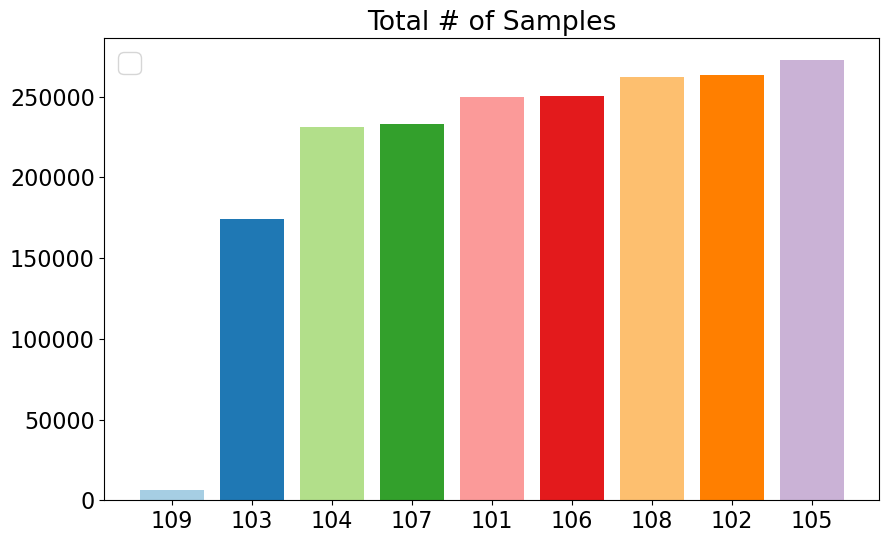

In [10]:
samples = df_pamap.groupby(['id']).count().reset_index()
samples_to_subject = pd.DataFrame()
samples_to_subject['id'] = samples['id']
samples_to_subject['samples'] = samples['time_stamp']
samples_to_subject = samples_to_subject.sort_values(by=['samples'])
pd_fast_plot(samples_to_subject,'samples','id','Total # of Samples')

In [ ]:
subject_counts = df_pamap['subject'].value_counts()

max_subject = subject_counts.idxmax()
max_count = subject_counts.max()
print(f"Subject {max_subject} has {max_count}")

min_subject = subject_counts.idxmin()
min_count = subject_counts.min()
print(f"Subject {min_subject} has {min_count}")

In [11]:
filter = df_pamap[df_pamap['id'] != 109]
samples = filter.groupby(['id']).count().reset_index()
mean_samples_per_subject = samples['time_stamp'].mean()
print("Avg samples per subject: ", mean_samples_per_subject)

Avg samples per subject:  242060.125


#### Activity distribution

In [12]:
def load_activity_map():
    map = {}
    map[0] = 'transient'
    map[1] = 'lying'
    map[2] = 'sitting'
    map[3] = 'standing'
    map[4] = 'walking'
    map[5] = 'running'
    map[6] = 'cycling'
    map[7] = 'Nordic_walking'
    map[9] = 'watching_TV'
    map[10] = 'computer_work'
    map[11] = 'car driving'
    map[12] = 'ascending_stairs'
    map[13] = 'descending_stairs'
    map[16] = 'vacuum_cleaning'
    map[17] = 'ironing'
    map[18] = 'folding_laundry'
    map[19] = 'house_cleaning'
    map[20] = 'playing_soccer'
    map[24] = 'rope_jumping'
    return map

map_ac = load_activity_map()

C:\Users\dimts\AppData\Local\Temp\ipykernel_12312\1872883728.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


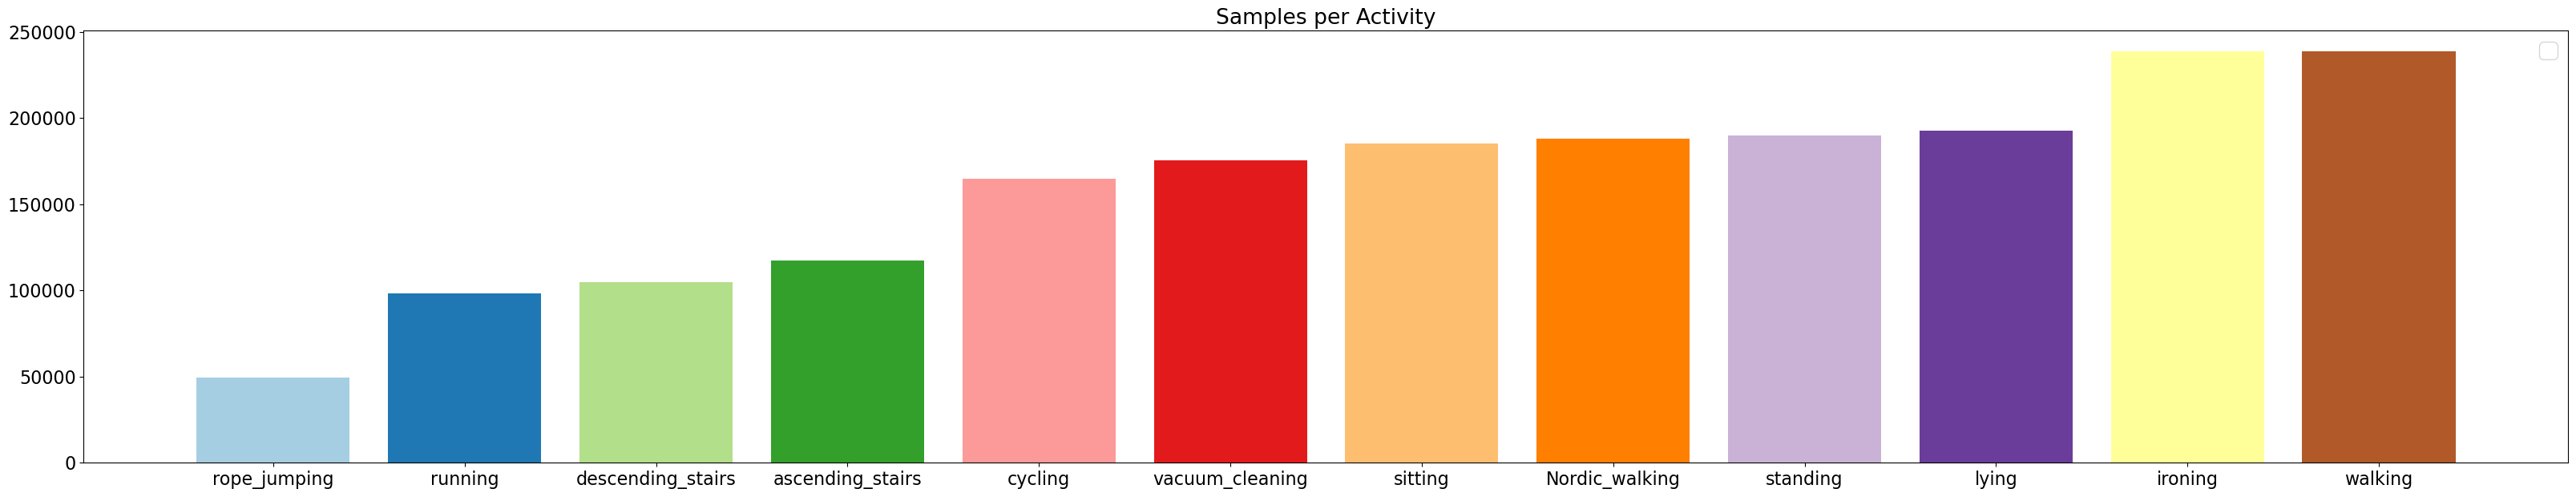

In [13]:
samples = data.groupby(['activity_id']).count().reset_index()
samples_to_subject = pd.DataFrame()
samples_to_subject['activity'] = [map_ac[x] for x in samples['activity_id']]
samples_to_subject['samples'] = samples['time_stamp']
samples_to_subject = samples_to_subject.sort_values(by=['samples'])
pd_fast_plot(samples_to_subject,'samples','activity','Samples per Activity',figsize=(40,7))

In [15]:
filter = data[data['activity_id'] != 109]
samples = filter.groupby(['activity_id']).count().reset_index()
mean_samples_per_activity = samples['time_stamp'].mean()
print("Avg samples per subject: ", mean_samples_per_activity)

Avg samples per subject:  161906.0


#### Visual Representation of Activities per Subject

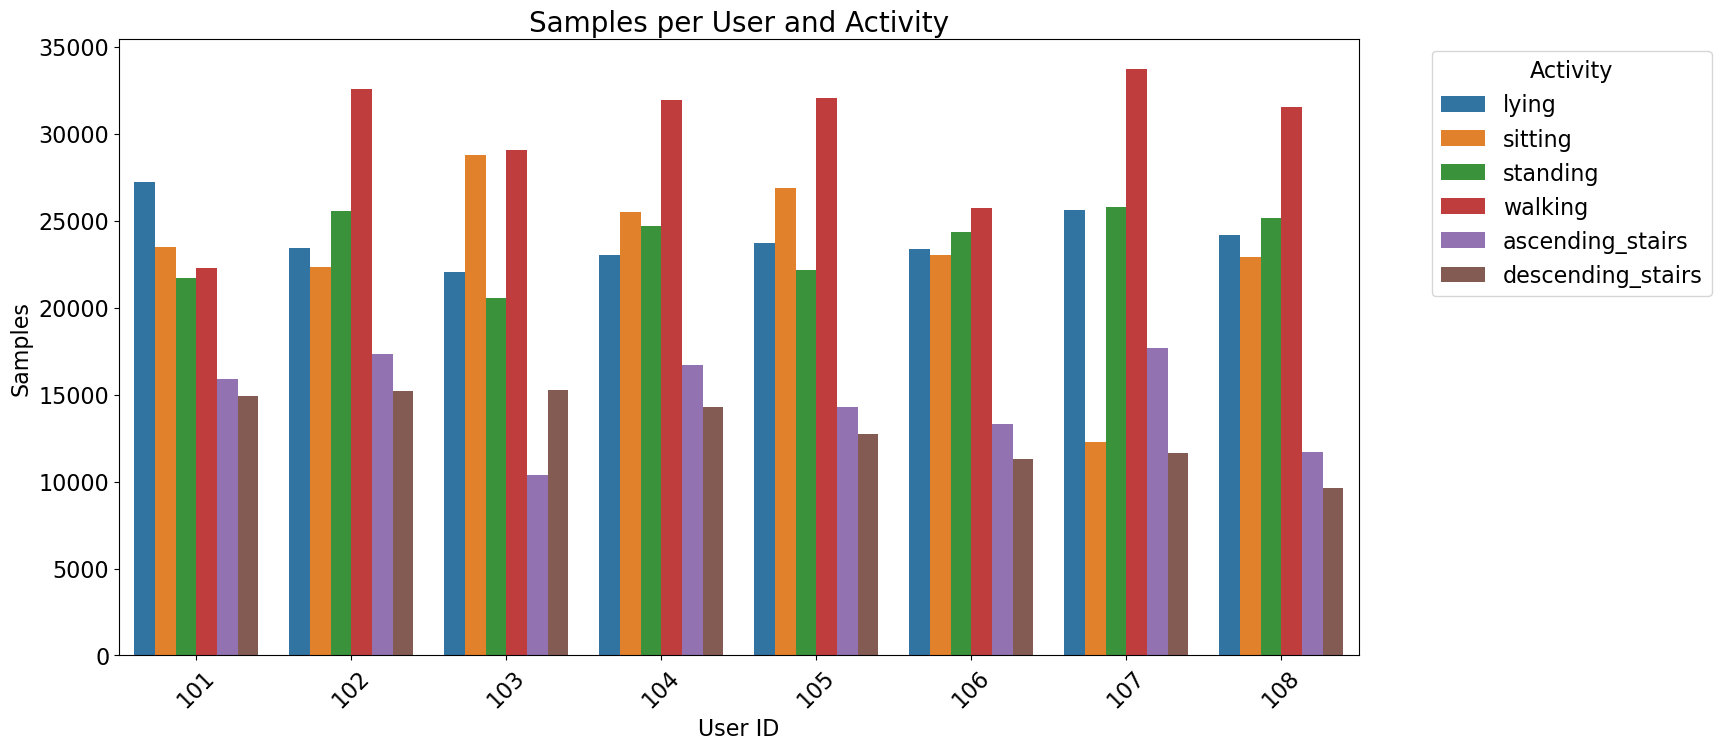

In [16]:
user_activity_counts = data.groupby(['id', 'activity_id']).size().reset_index(name='samples')

# Map activity names
user_activity_counts['activity'] = user_activity_counts['activity_id'].map(map_ac)

# Filter out activities of interest
activities = ['standing', 'walking', 'sitting', 'lying', 'descending_stairs', 'ascending_stairs']
user_activity_counts = user_activity_counts[user_activity_counts['activity'].isin(activities)]

# Plot
plt.figure(figsize=(16, 8))
plt.title('Samples per User and Activity', fontsize=20)
sns.barplot(x='id', y='samples', hue='activity', data=user_activity_counts)
plt.xlabel('User ID')
plt.ylabel('Samples')
plt.xticks(rotation=45)
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Heart-rate per subject and per activity

C:\Users\dimts\AppData\Local\Temp\ipykernel_12312\1872883728.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


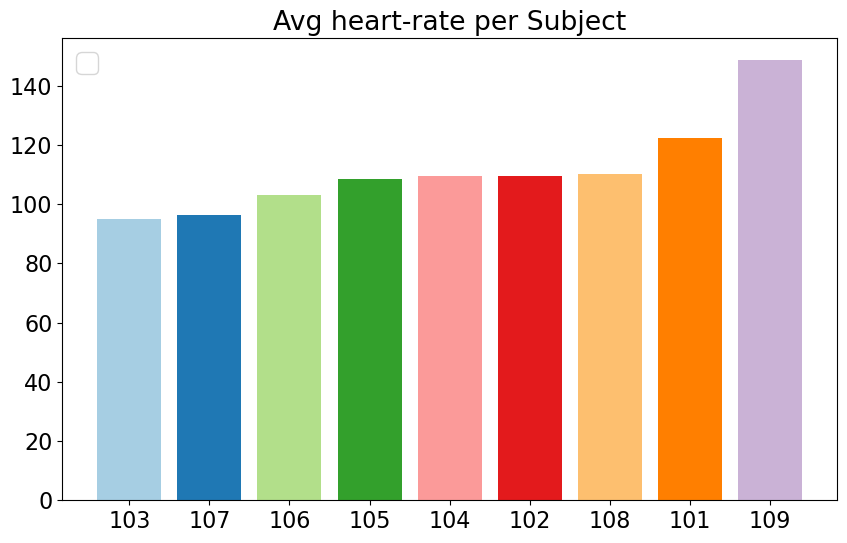

In [17]:
#per Subject

result_id = data.groupby(['id']).mean().reset_index()
samples_heart_rate = pd.DataFrame()
samples_heart_rate['id'] = result_id['id']
samples_heart_rate['heart_rate'] = result_id['heart_rate']
samples_heart_rate = samples_heart_rate.sort_values(by=['heart_rate'])
pd_fast_plot(samples_heart_rate,'heart_rate','id','Avg heart-rate per Subject')

C:\Users\dimts\AppData\Local\Temp\ipykernel_12312\1872883728.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


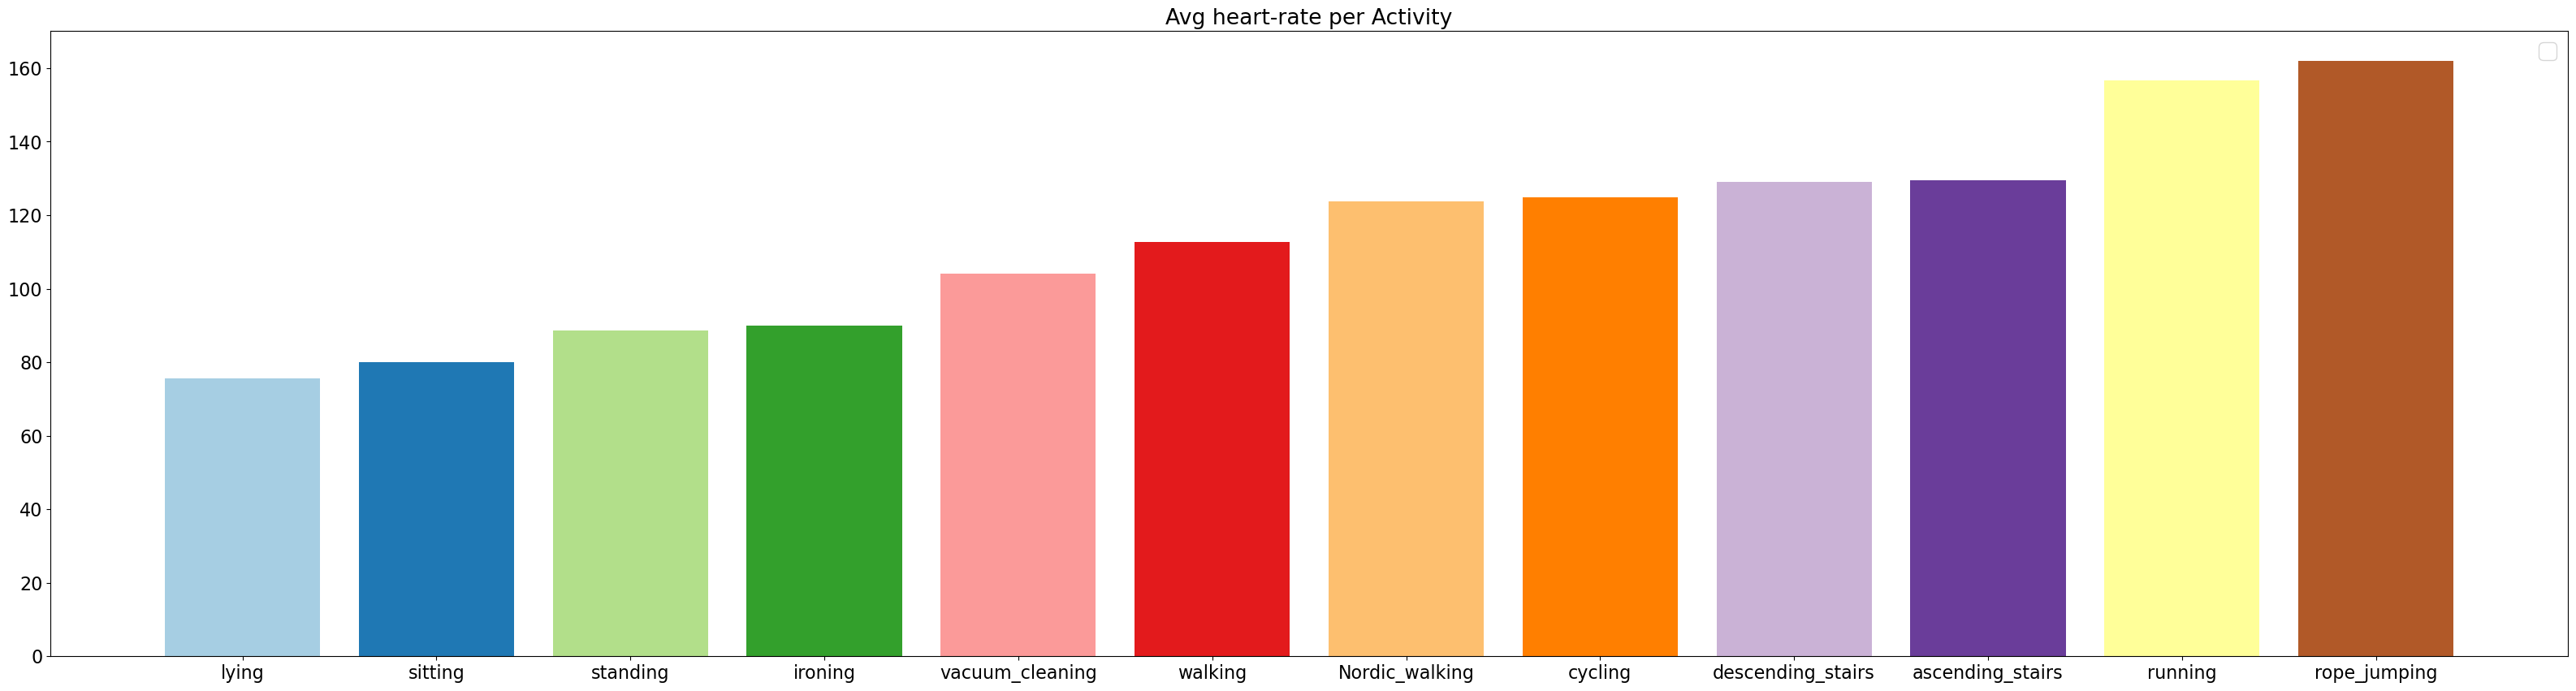

In [18]:
activity_mean = data.groupby(['activity_id']).mean().reset_index()
samples_heart_rate = pd.DataFrame()
samples_heart_rate['activity'] = [map_ac[x] for x in activity_mean['activity_id']]
samples_heart_rate['heart_rate'] = activity_mean['heart_rate']
samples_heart_rate = samples_heart_rate.sort_values(by=['heart_rate'])
pd_fast_plot(samples_heart_rate,'heart_rate','activity','Avg heart-rate per Activity',figsize=(40,10))

In [ ]:
#### Heart-rate outliers

count    1.942872e+06
mean     1.074879e+02
std      2.699215e+01
min      5.700000e+01
25%      8.600000e+01
50%      1.040000e+02
75%      1.240000e+02
max      2.020000e+02
Name: heart_rate, dtype: float64


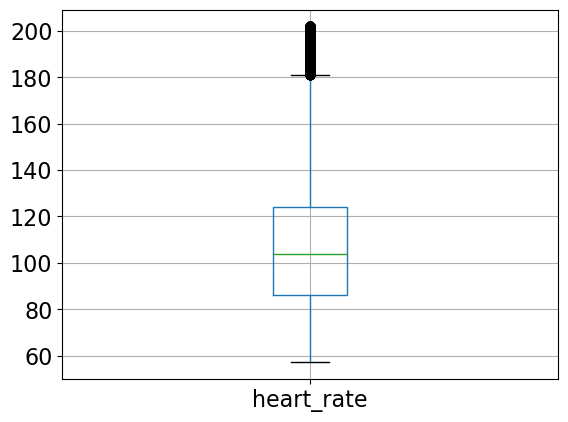

In [19]:
stats = data['heart_rate'].describe()
print(stats)

data.boxplot(column='heart_rate')
plt.show()

#### Temperature Analysis

C:\Users\dimts\AppData\Local\Temp\ipykernel_12312\2154855069.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(result_id['id'])


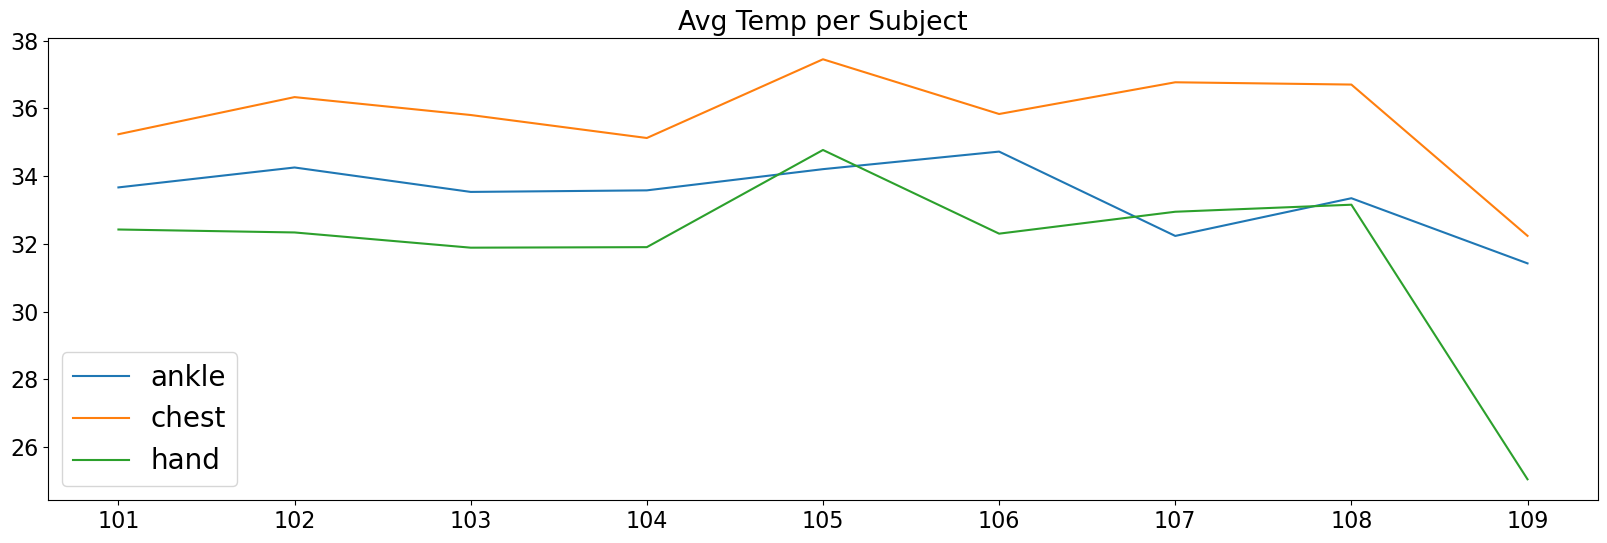

In [20]:
#per Subject

samples_temperature = pd.DataFrame()
samples_temperature['ankle'] = result_id['ankle_temperature']
samples_temperature['chest'] = result_id['chest_temperature']
samples_temperature['hand'] = result_id['hand_temperature']

ax = samples_temperature.plot(kind='line', figsize=(20,6), title='Avg Temp per Subject')
a = ax.set_xticklabels(result_id['id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samples_temperature)))

C:\Users\dimts\AppData\Local\Temp\ipykernel_12312\1776789781.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(samples_temperature['activity'])


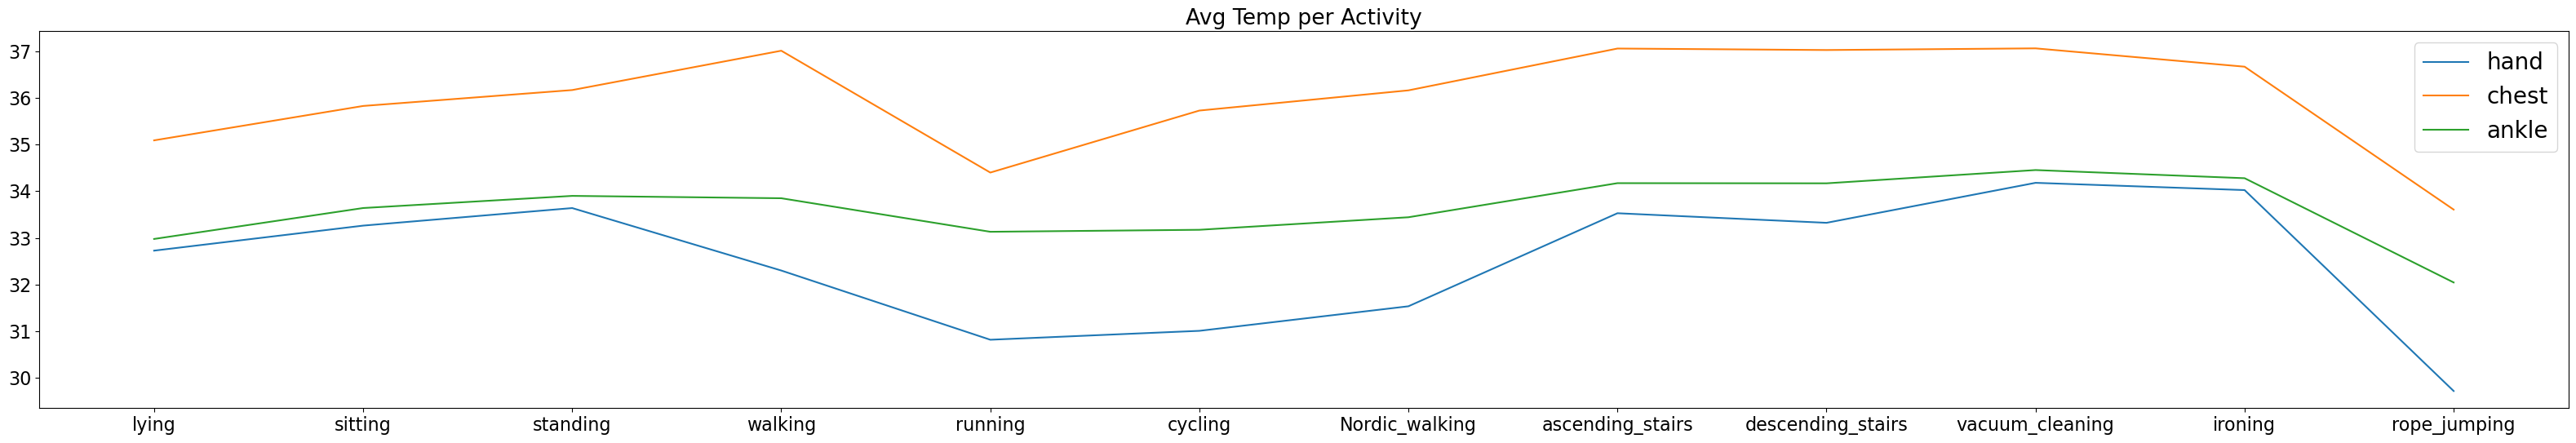

In [22]:
#per activity

samples_temperature = pd.DataFrame()
samples_temperature['activity'] = [map_ac[x] for x in activity_mean['activity_id']]
samples_temperature['hand'] = activity_mean['hand_temperature']
samples_temperature['chest'] = activity_mean['chest_temperature']
samples_temperature['ankle'] = activity_mean['ankle_temperature']

ax = samples_temperature.plot(kind='line', figsize=(40,6), title='Avg Temp per Activity')
a = ax.set_xticklabels(samples_temperature['activity'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samples_temperature)))

#### Acceleration Analysis

C:\Users\dimts\AppData\Local\Temp\ipykernel_12312\3800913813.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(result_id['id'])


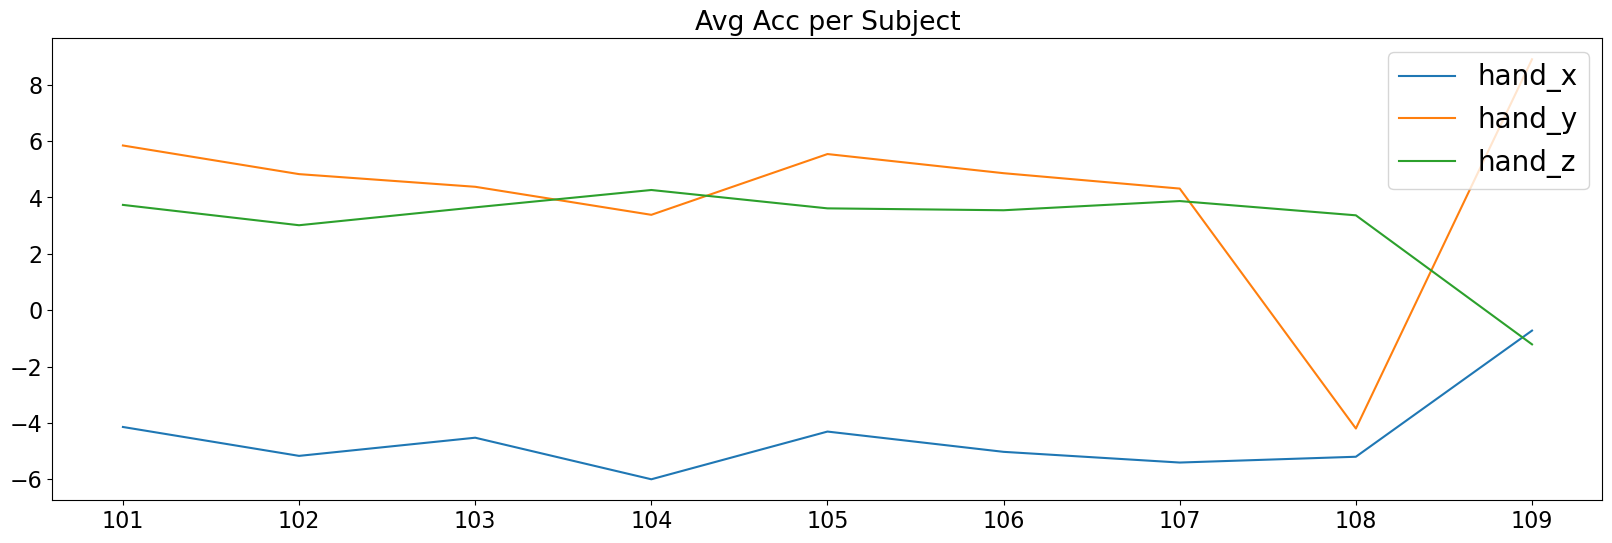

In [23]:
result_id = data.groupby(['id']).mean().reset_index()
samples = pd.DataFrame()
samples['hand_x'] = result_id['hand_3D_acceleration_16_x']
samples['hand_y'] = result_id['hand_3D_acceleration_16_y']
samples['hand_z'] = result_id['hand_3D_acceleration_16_z']
ax = samples.plot(kind='line', figsize=(20,6), title='Avg Acc per Subject')
a = ax.set_xticklabels(result_id['id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samples)))

C:\Users\dimts\AppData\Local\Temp\ipykernel_12312\3875679791.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(samples_temperature['activity'])


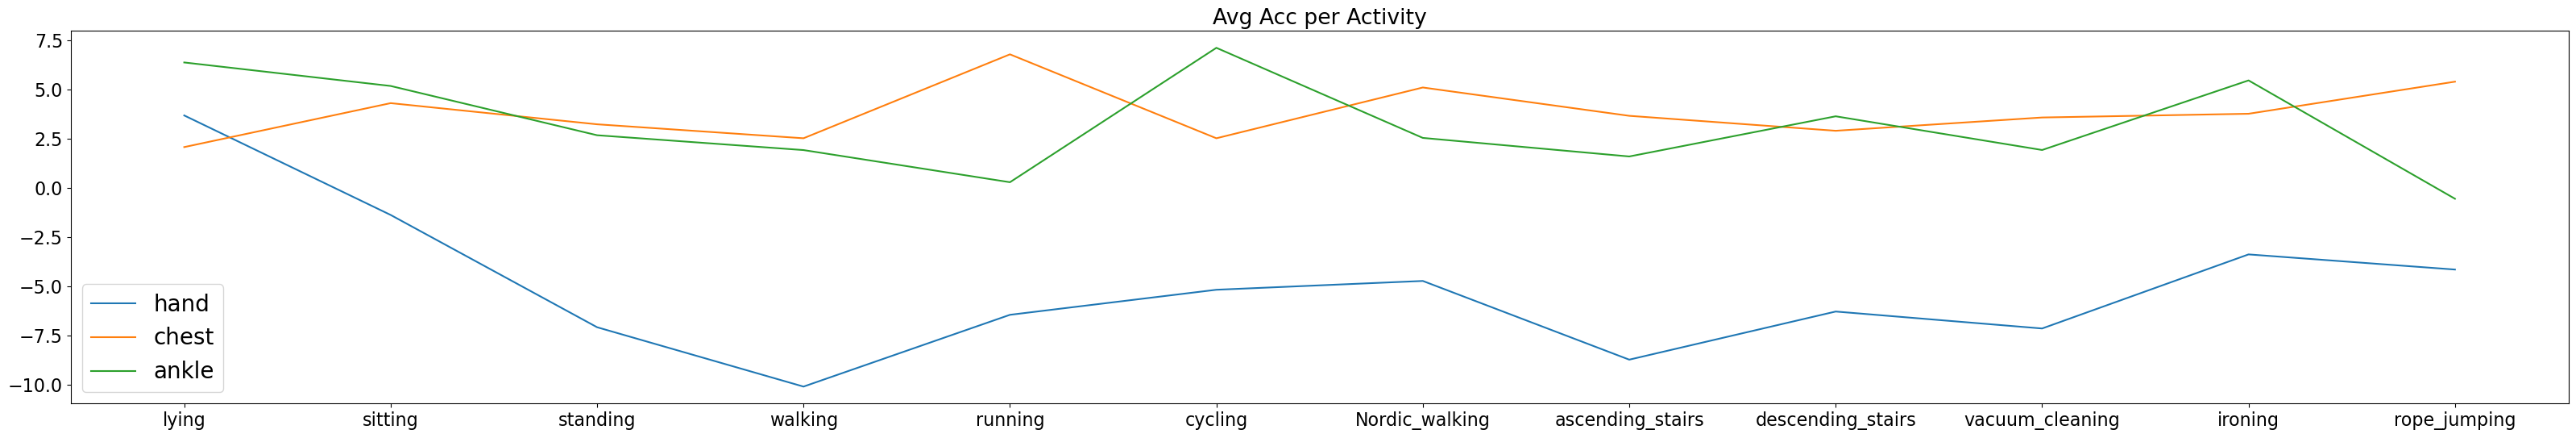

In [24]:
samples_temperature = pd.DataFrame()
samples_temperature['activity'] = [map_ac[x] for x in activity_mean['activity_id']]
samples_temperature['hand'] = activity_mean['hand_3D_acceleration_16_x']
samples_temperature['chest'] = activity_mean['hand_3D_acceleration_16_y']
samples_temperature['ankle'] = activity_mean['hand_3D_acceleration_16_z']

ax = samples_temperature.plot(kind='line', figsize=(40,6), title='Avg Acc per Activity')
a = ax.set_xticklabels(samples_temperature['activity'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samples_temperature)))

#### Investigating which columns are mostly correlated with Activity

In [105]:
numerical_columns = data.select_dtypes(include='number').columns

correlation_results = {}
for col in numerical_columns:
    correlation_results[col] = data[col].corr(data['activity_id'])

#sort by correlation value
sorted_correlation_results = sorted(correlation_results.items(), key=lambda x: abs(x[1]), reverse=True)

top_correlated_columns = sorted_correlation_results[1:10]  # Adjust the number of top correlated columns to display
for col, corr in top_correlated_columns:
    print(f"{col}: Correlation={corr}")

chest_3D_acceleration_6_z: Correlation=-0.4293890996051596
chest_3D_acceleration_16_z: Correlation=-0.4283357099022125
chest_3D_magnetometer_y: Correlation=-0.2983990707741806
heart_rate: Correlation=0.26534784230618697
chest_3D_magnetometer_z: Correlation=0.2652011054097779
chest_3D_magnetometer_x: Correlation=-0.24107782384281132
ankle_3D_magnetometer_z: Correlation=0.20989724418451125
ankle_3D_magnetometer_x: Correlation=-0.19963053154954744
ankle_temperature: Correlation=0.19502298692591924


#### Correlation of columns to find collinearities, dependencies etc

In [97]:
df_corr = data.corr()
df_corr = df_corr.drop(['activity_id'], axis = 1)

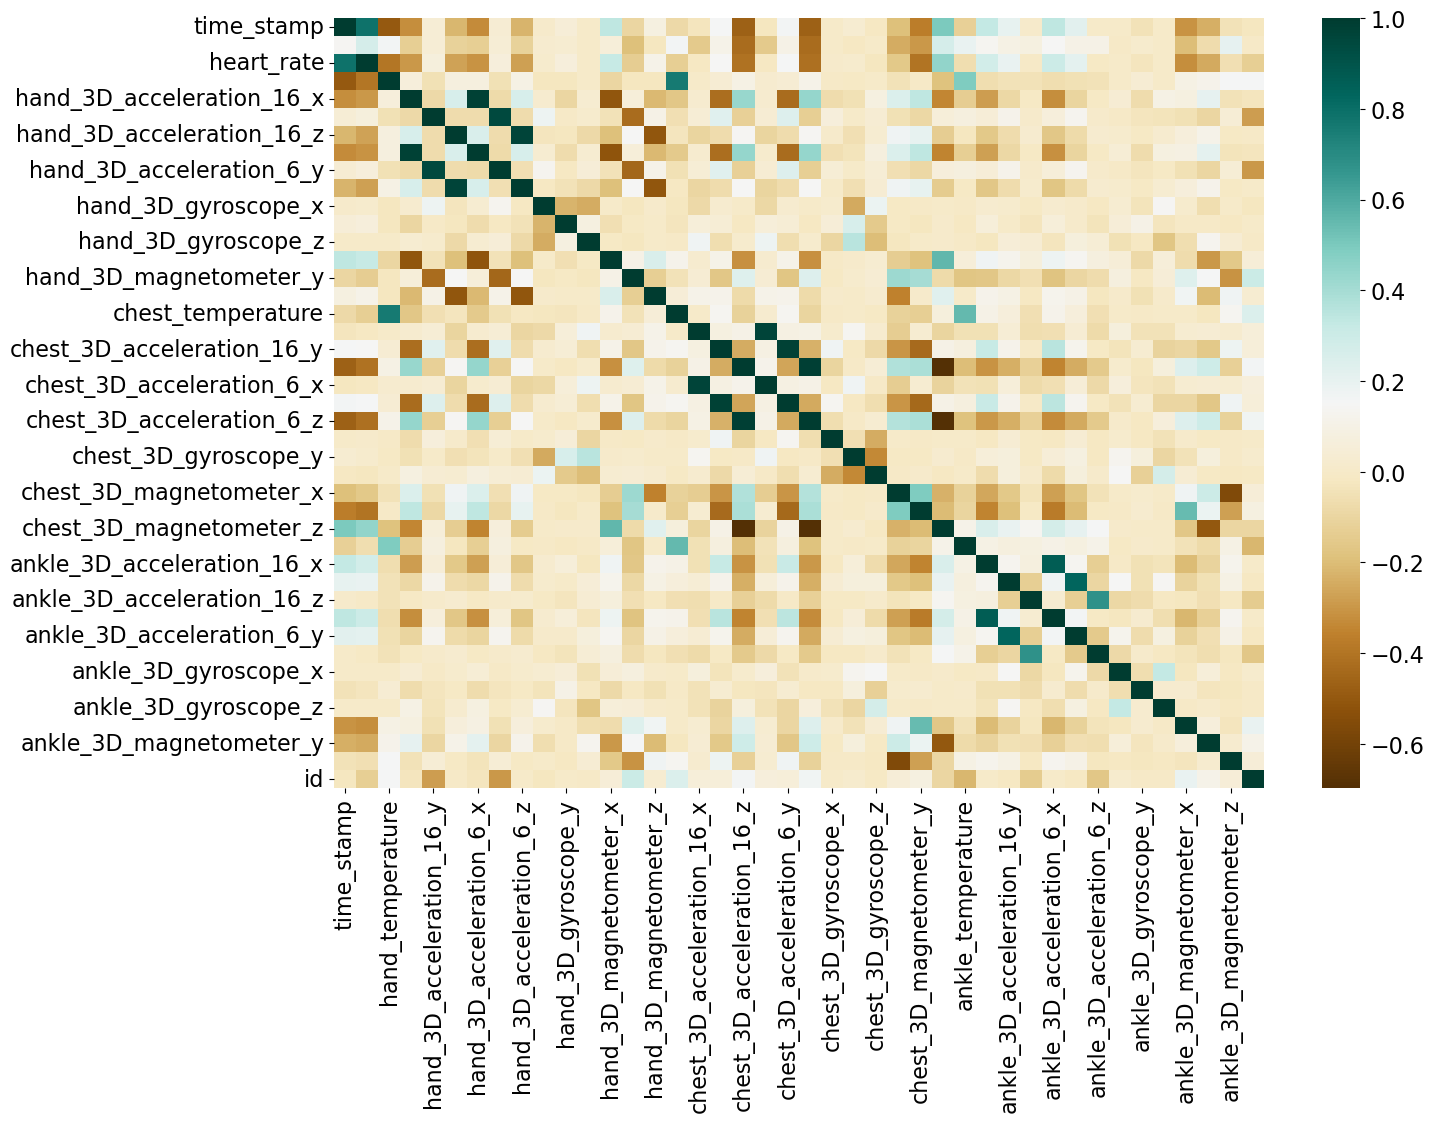

In [26]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=bool), cmap = "BrBG",ax=ax)
plt.show()

In [36]:
top_corr_unique = df_corr.unstack().sort_values(ascending=False).drop_duplicates()
top_corr_unique = top_corr_unique[top_corr_unique < 1.0].head(10)

print("Top 10 most correlated features:")
for (feature1, feature2), correlation in top_corr_unique.items():
    print(f"{feature1} and {feature2}: {correlation}")

Top 10 most correlated features:
chest_3D_acceleration_6_z and chest_3D_acceleration_16_z: 0.9846601401883961
hand_3D_acceleration_16_x and hand_3D_acceleration_6_x: 0.9786945538863594
chest_3D_acceleration_6_y and chest_3D_acceleration_16_y: 0.9766435862146159
hand_3D_acceleration_6_z and hand_3D_acceleration_16_z: 0.9645484903699503
chest_3D_acceleration_6_x and chest_3D_acceleration_16_x: 0.9633267479167398
hand_3D_acceleration_6_y and hand_3D_acceleration_16_y: 0.9452191692107235
ankle_3D_acceleration_6_x and ankle_3D_acceleration_16_x: 0.8659920892899807
ankle_3D_acceleration_6_y and ankle_3D_acceleration_16_y: 0.8301135277630297
heart_rate and time_stamp: 0.781719188404796
hand_temperature and chest_temperature: 0.7575141282482154


In [ ]:
#### Sensor Distribution

In [ ]:
???????????

### - Dataset 2: UCI-HAR

In [46]:
#begin by loading the features
path = '../human+activity+recognition+using+smartphones/UCI HAR Dataset/'

features = list()
with open(path + 'features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]

seen = set()
uniq_features = []
for idx, x in enumerate(features):
    if x not in seen:
        uniq_features.append(x)
        seen.add(x)
    elif x + 'n' not in seen:
        uniq_features.append(x + 'n')
        seen.add(x + 'n')
    else:
        uniq_features.append(x + 'nn')
        seen.add(x + 'nn')
len(uniq_features)

561

In [53]:
#train data

X_train = pd.read_csv(path + 'train/X_train.txt', delim_whitespace=True, header=None, names=uniq_features)

# # add subject column to the dataframe
X_train['subject_id'] = pd.read_csv(path + 'train/subject_train.txt', header=None)

y_train = pd.read_csv(path + 'train/y_train.txt', names=['activity_id'])
activity_mapping = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', \
                    4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}
y_train_labels = y_train.replace({'activity_id': activity_mapping})

#create final df
train = X_train
train['activity_id'] = y_train
train['activity_name'] = y_train_labels
train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity_id,activity_name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [54]:
#test data

X_test = pd.read_csv(path + 'test/X_test.txt', delim_whitespace=True, header=None, names=uniq_features)

X_test['subject_id'] = pd.read_csv(path + 'test/subject_test.txt', header=None)

y_test = pd.read_csv(path + 'test/y_test.txt', names=['activity_id'])

activity_mapping = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', \
                    4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}
y_test_labels = y_test.replace({'activity_id': activity_mapping})
test = X_test
test['activity_id'] = y_test
test['activity_name'] = y_test_labels
test.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity_id,activity_name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [ ]:
#### Some Dataset stats

In [59]:
print('Df shape', X_train.shape)
print('Total columns', len(X_train.columns))
print('No of subjects', len(X_train.drop(['activity_name'], axis = 1).groupby(['subject_id']).mean().reset_index()))
print('No of total activities',len(X_train.drop(['activity_name'], axis = 1).groupby(['activity_id']).mean().reset_index()))

Df shape (7352, 564)
Total columns 564
No of subjects 21
No of total activities 6


#### Check for null or NaN values: 
##### In this case there are no such values, so no step to be taken here.

In [60]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [ ]:
#### Subject distribution - can be used in Data Segmentation/Hypotheses etc

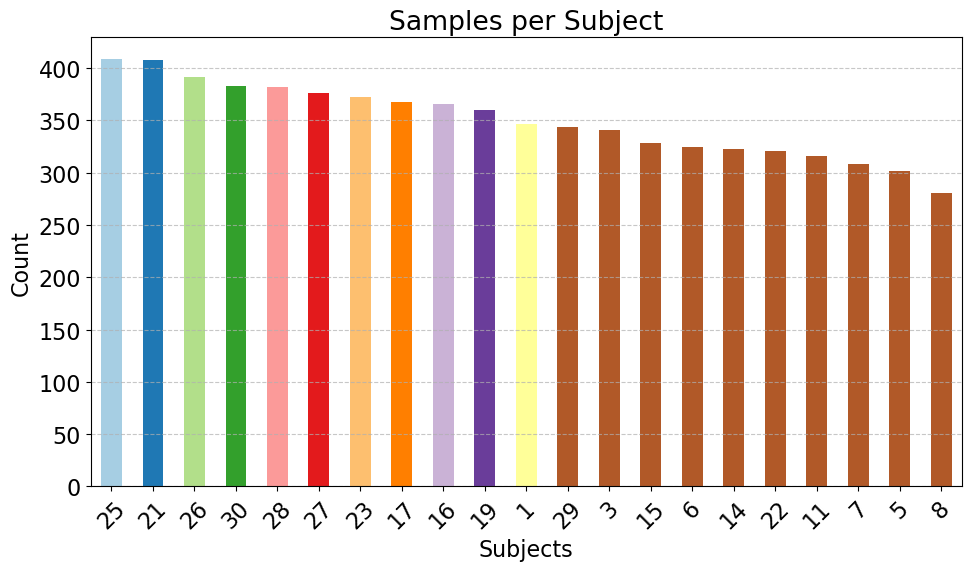

In [70]:
subject_counts = train['subject_id'].value_counts()

num_subjects = len(subject_counts)
colors = plt.cm.Paired(range(num_subjects))
plt.figure(figsize=(10, 6)) 
subject_counts.plot(kind='bar', color=colors) 
plt.title('Samples per Subject')
plt.xlabel('Subjects')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

In [71]:
max_subject = subject_counts.idxmax()
max_count = subject_counts.max()
print(f"Subject {max_subject} has {max_count}")

min_subject = subject_counts.idxmin()
min_count = subject_counts.min()
print(f"Subject {min_subject} has {min_count}")

Subject 25 has 409
Subject 8 has 281


In [67]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject_id',
       'activity_id', 'activity_name'],
      dtype='object', length=564)

In [81]:
rows_per_subj = train.groupby('subject_id').size()
avg_rows = rows_per_subj.mean()
print("Average number of columns per subject:", avg_rows)

Average number of columns per subject: 350.0952380952381


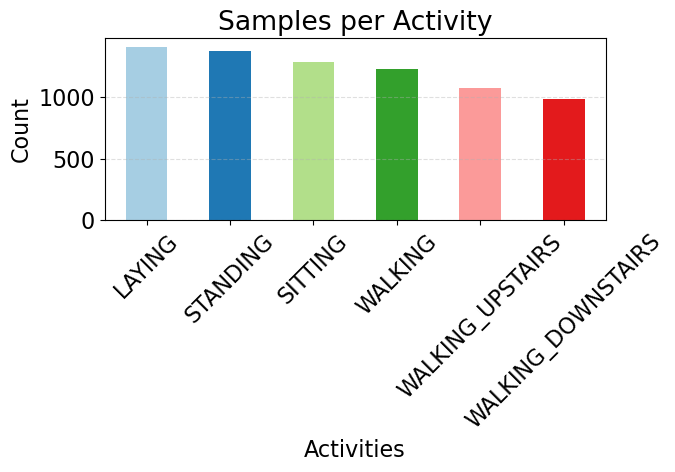

In [88]:
#the same for activities

activity_counts = train['activity_id'].map(activity_mapping).value_counts()

num_activities = len(activity_counts)
colors = plt.cm.Paired(range(num_activities))

plt.figure(figsize=(7, 5))
activity_counts.plot(kind='bar', color=colors)
plt.title('Samples per Activity')
plt.xlabel('Activities')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [90]:
max_act = activity_counts.idxmax()
max_count = activity_counts.max()
print(f"{max_act} has {max_count} samples")

min_act = activity_counts.idxmin()
min_count = activity_counts.min()
print(f"{min_act} has {min_count} samples")

LAYING has 1407 samples
WALKING_DOWNSTAIRS has 986 samples


#### Visual Representation of Activities per Subject

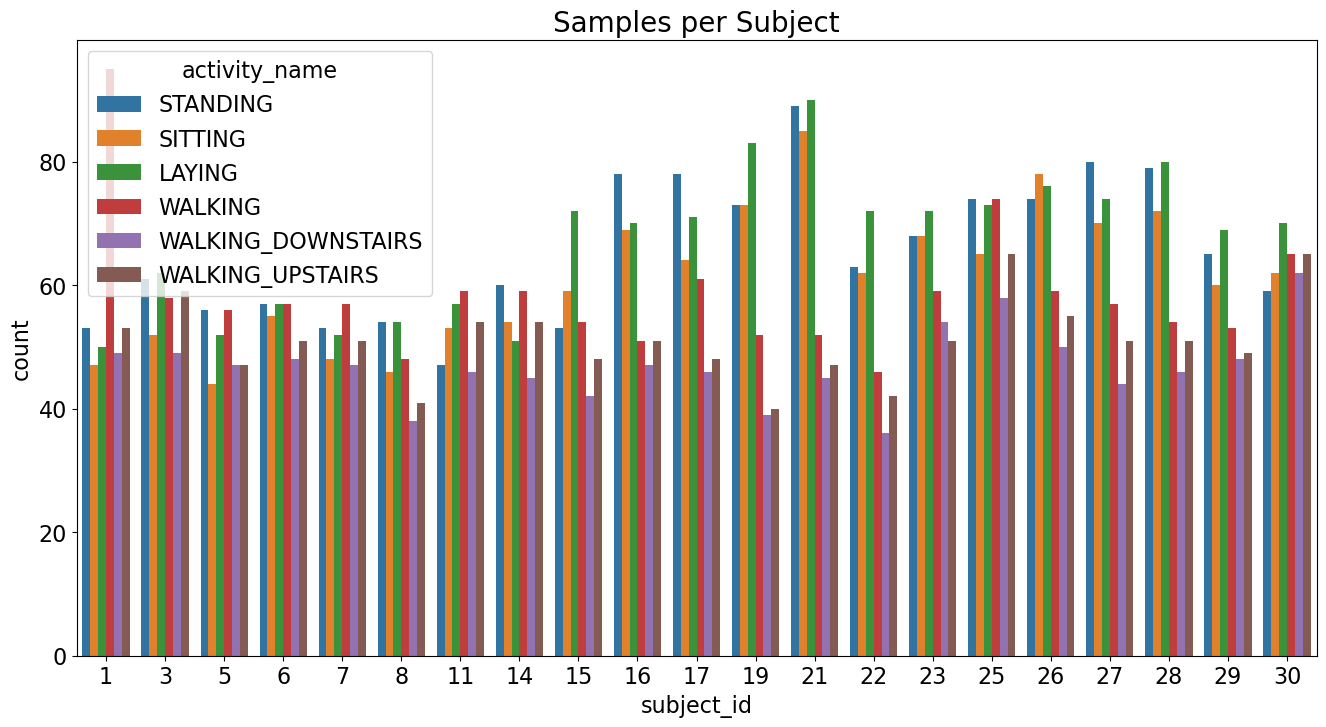

In [93]:
plt.figure(figsize=(16,8))
plt.title('Samples per Subject', fontsize=20)
sns.countplot(x='subject_id',hue='activity_name', data = train)
plt.show()

#### Investigating which columns are mostly correlated with Activity

In [104]:
numerical_columns = train.select_dtypes(include='number').columns

correlation_results = {}
for col in numerical_columns:
    correlation_results[col] = train[col].corr(train['activity_id'])

#sort by correlation value
sorted_correlation_results = sorted(correlation_results.items(), key=lambda x: abs(x[1]), reverse=True)

top_correlated_columns = sorted_correlation_results[1:10]  # Adjust the number of top correlated columns to display
for col, corr in top_correlated_columns:
    print(f"{col}: Correlation={corr}")

tBodyAccJerk-entropy()-Z: Correlation=-0.8594497443839431
tBodyAccJerk-entropy()-X: Correlation=-0.8574540170931816
fBodyAccJerk-entropy()-Y: Correlation=-0.853579233347466
tBodyAccJerk-entropy()-Y: Correlation=-0.8534249800667506
tBodyAccJerkMag-entropy(): Correlation=-0.8476506009428085
fBodyAccJerk-entropy()-X: Correlation=-0.8446601155254597
tBodyGyroJerk-entropy()-Z: Correlation=-0.8429344570181492
fBodyAcc-entropy()-Y: Correlation=-0.8398241388912253
fBodyAccJerk-entropy()-Z: Correlation=-0.8323958285505079


#### Investigating the highest correlated feature tBodyAccJerk-entropy()-Z. 

##### It nicely separates between stationary and moving activities, hence the high correlation with Activity 

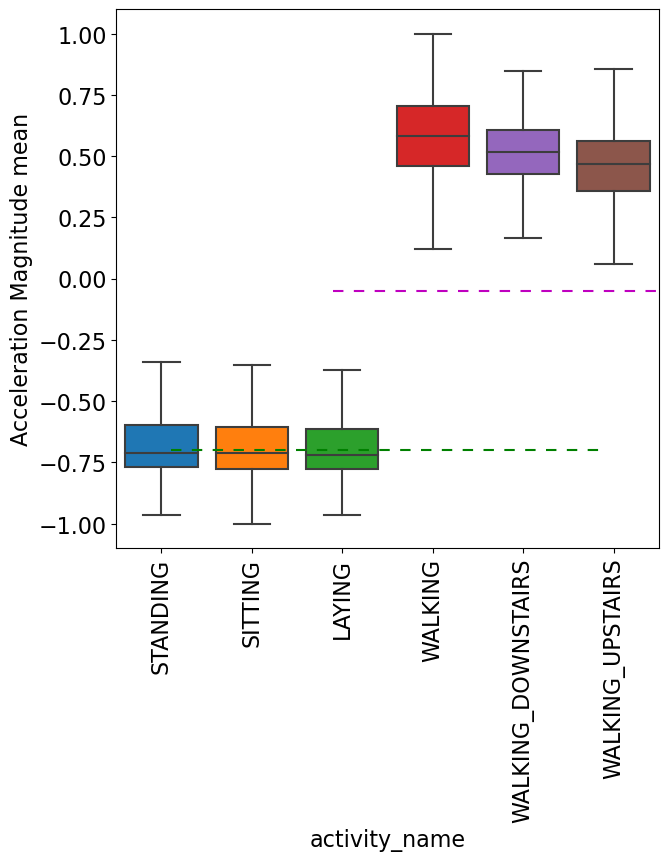

In [107]:
plt.figure(figsize=(7,7))
sns.boxplot(x='activity_name', y='tBodyAccJerk-entropy()-Z',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

#### Correlation of columns to find collinearities, dependencies etc

In [130]:
temp = train.drop(['activity_id', 'activity_name'], axis = 1)
df_corr = temp.corr()

In [131]:
top_corr_unique = df_corr.unstack().sort_values(ascending=False).drop_duplicates()
top_corr_unique = top_corr_unique[top_corr_unique < 1.0].head(10)

print("Top 10 most correlated features:")
for (feature1, feature2), correlation in top_corr_unique.items():
    print(f"{feature1} and {feature2}: {correlation}")

Top 10 most correlated features:
tBodyAccJerkenergyZ and fBodyAccJerkenergyZ: 0.9999997552584101
fBodyAccJerkenergyY and tBodyAccJerkenergyY: 0.9999996705449755
tBodyAccJerkenergyX and fBodyAccJerkenergyX: 0.9999993920536718
fBodyAccbandsEnergy124 and fBodyAccenergyX: 0.9998784309699545
fBodyGyroenergyX and fBodyGyrobandsEnergy124: 0.99976657018449
fBodyAccbandsEnergy124n and fBodyAccenergyY: 0.9996610821845465
tBodyAccJerkMagmean and tBodyAccJerksma: 0.9996564183379197
tBodyAccenergyX and fBodyAccenergyX: 0.9996112814198883
fBodyGyrobandsEnergy124nn and fBodyGyroenergyZ: 0.9995234782947701
fBodyAccbandsEnergy124 and tBodyAccenergyX: 0.9995072102052956


#### Acceleration analysis

In [120]:
# process feature name for simplicity

parentheses_pattern = re.compile(r'[\(\)]')
hyphen_pattern = re.compile(r'[-]')
comma_pattern = re.compile(r',')

# Apply the regular expressions to remove the specified characters from column names
train.columns = [parentheses_pattern.sub('', col) for col in train.columns]
train.columns = [hyphen_pattern.sub('', col) for col in train.columns]
train.columns = [comma_pattern.sub('', col) for col in train.columns]

test.columns = [parentheses_pattern.sub('', col) for col in test.columns]
test.columns = [hyphen_pattern.sub('', col) for col in test.columns]
test.columns = [comma_pattern.sub('', col) for col in test.columns]

# Print the modified column names of the test DataFrame
print(test.columns)

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject_id', 'activity_id', 'activity_name'],
      dtype='object', length=564)


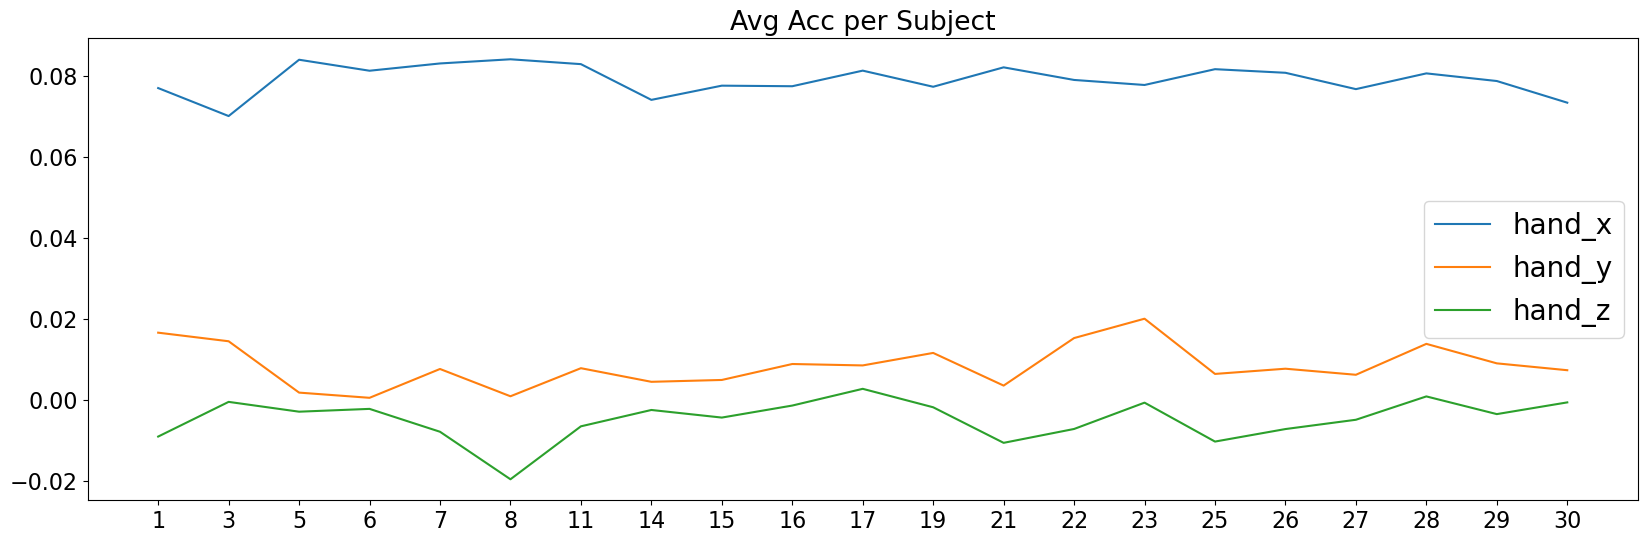

In [123]:
result_id = train.drop(['activity_name', 'activity_id'], axis=1).groupby(['subject_id']).mean().reset_index()
samples = pd.DataFrame()
samples['hand_x'] = result_id['tBodyAccJerkmeanX']
samples['hand_y'] = result_id['tBodyAccJerkmeanY']
samples['hand_z'] = result_id['tBodyAccJerkmeanZ']
ax = samples.plot(kind='line', figsize=(20,6), title='Avg Acc per Subject')
ax.set_xticks(np.arange(len(samples)))
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samples)))

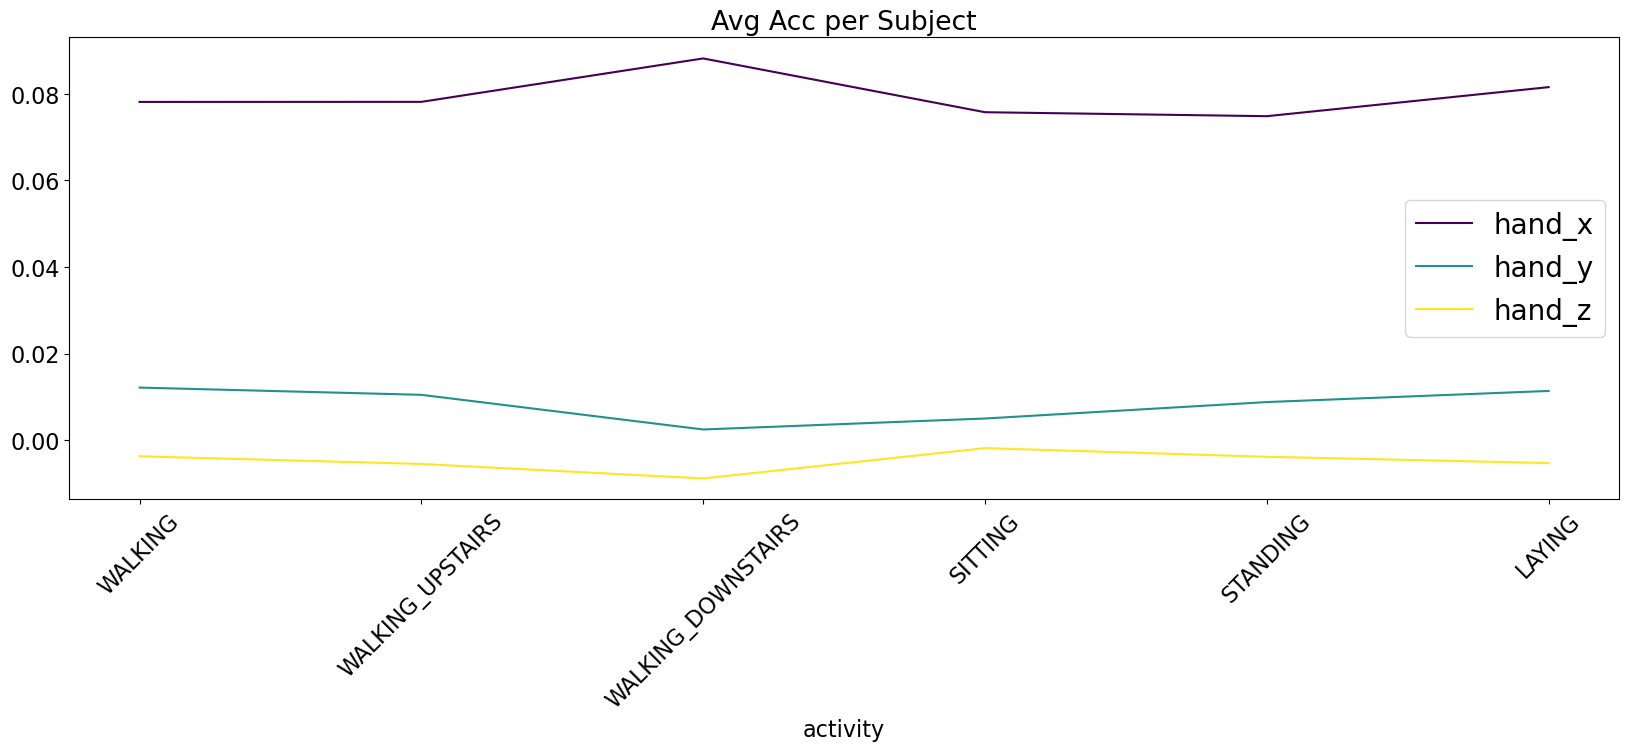

In [128]:
result_id = train.drop(['activity_name'], axis=1).groupby(['activity_id']).mean().reset_index()

samples = pd.DataFrame()
samples['hand_x'] = result_id['tBodyAccJerkmeanX']
samples['hand_y'] = result_id['tBodyAccJerkmeanY']
samples['hand_z'] = result_id['tBodyAccJerkmeanZ']
samples['activity'] = result_id['activity_id']

activity_mapping = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 
                    4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}

# Map numerical activity labels to activity names
samples['activity'] = samples['activity'].map(activity_mapping)

ax = samples.plot(kind='line', x='activity', figsize=(20,6), title='Avg Acc per Subject', colormap='viridis')
b = ax.legend(fontsize=20)
c = ax.set_xticks(np.arange(len(samples)))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### - Dataset 3: MHEALTH: 

In [26]:
df_mhealth = pd.DataFrame()
activity_mapping = {0: 'NO_ACTIVITY', 1: 'STANDING', 2: 'SITTING', 3: 'LAYING', \
                    4: 'WALKING', 5: 'WALKING_UPSTAIRS', 6: 'WAIST_BEND_FORWARD',\
                    7: 'FRONTAL_ARMS', 8: 'KNEE_BEND', 9: 'CYCLING', \
                    10: 'JOGGING', 11: 'RUNNING', 12: 'JUMP'}

In [27]:
for i in range(1, 11):
    df_s = pd.read_csv(f'../mhealth+dataset/MHEALTHDATASET/mHealth_subject{i}.log', header=None, sep='\t')
    df_s = df_s.loc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]].rename(columns= {
        0: 'acc_ch_x', 
        1: 'acc_ch_y', 
        2: 'acc_ch_z',
        3: 'ecg_sig_1',
        4: 'ecg_sig_2',
        5: 'acc_la_x', 
        6: 'acc_la_y', 
        7: 'acc_la_z', 
        8: 'gyr_la_x',
        9: 'gyr_la_y', 
        10: 'gyr_la_z', 
        11: 'mag_la_x', 
        12: 'mag_la_y', 
        13: 'mag_la_z', 
        14: 'acc_rw_x', 
        15: 'acc_rw_y',
        16: 'acc_rw_z', 
        17: 'gyr_rw_x', 
        18: 'gyr_rw_y', 
        19: 'gyr_rw_z', 
        20: 'mag_rw_x', 
        21: 'mag_rw_y', 
        22: 'mag_rw_z',
        23: 'activity'
    })
    df_s['subject'] = f'subject{i}'
    df_mhealth = pd.concat([df_mhealth, df_s])
    
df_mhealth.rename(columns = {'subject': 'subject_id'}, inplace = True)
df_mhealth.rename(columns = {'activity': 'activity_id'}, inplace = True)
df_mhealth['activity_name'] = df_mhealth['activity_id'].map(activity_mapping)

In [28]:
df_mhealth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1215745 entries, 0 to 98303
Data columns (total 26 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   acc_ch_x       1215745 non-null  float64
 1   acc_ch_y       1215745 non-null  float64
 2   acc_ch_z       1215745 non-null  float64
 3   ecg_sig_1      1215745 non-null  float64
 4   ecg_sig_2      1215745 non-null  float64
 5   acc_la_x       1215745 non-null  float64
 6   acc_la_y       1215745 non-null  float64
 7   acc_la_z       1215745 non-null  float64
 8   gyr_la_x       1215745 non-null  float64
 9   gyr_la_y       1215745 non-null  float64
 10  gyr_la_z       1215745 non-null  float64
 11  mag_la_x       1215745 non-null  float64
 12  mag_la_y       1215745 non-null  float64
 13  mag_la_z       1215745 non-null  float64
 14  acc_rw_x       1215745 non-null  float64
 15  acc_rw_y       1215745 non-null  float64
 16  acc_rw_z       1215745 non-null  float64
 17  gyr_rw_x       

#### Some Dataset stats

In [29]:
print('Df shape', df_mhealth.shape)
print('Total columns', len(df_mhealth.columns))
print('No of subjects', len(df_mhealth.drop(['activity_name'], axis = 1).groupby(['subject_id']).mean().reset_index()))

Df shape (1215745, 26)
Total columns 26
No of subjects 10


#### Subject distribution - can be used in Data Segmentation/Hypotheses etc

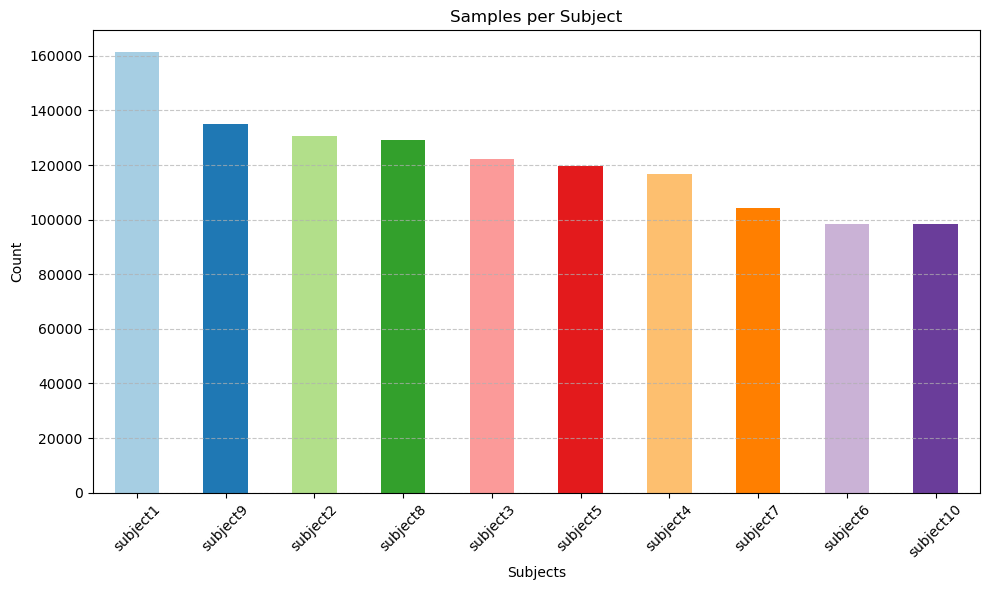

In [30]:
subject_counts = df_mhealth['subject_id'].value_counts()

num_subjects = len(subject_counts)
colors = plt.cm.Paired(range(num_subjects))
plt.figure(figsize=(10, 6)) 
subject_counts.plot(kind='bar', color=colors) 
plt.title('Samples per Subject')
plt.xlabel('Subjects')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

#### Activity distribution:
##### Clearly, NULL activity 0 is heavily represented in the data. Should be resampled to a number of occurences close to the other classes, which are comparable in representation.

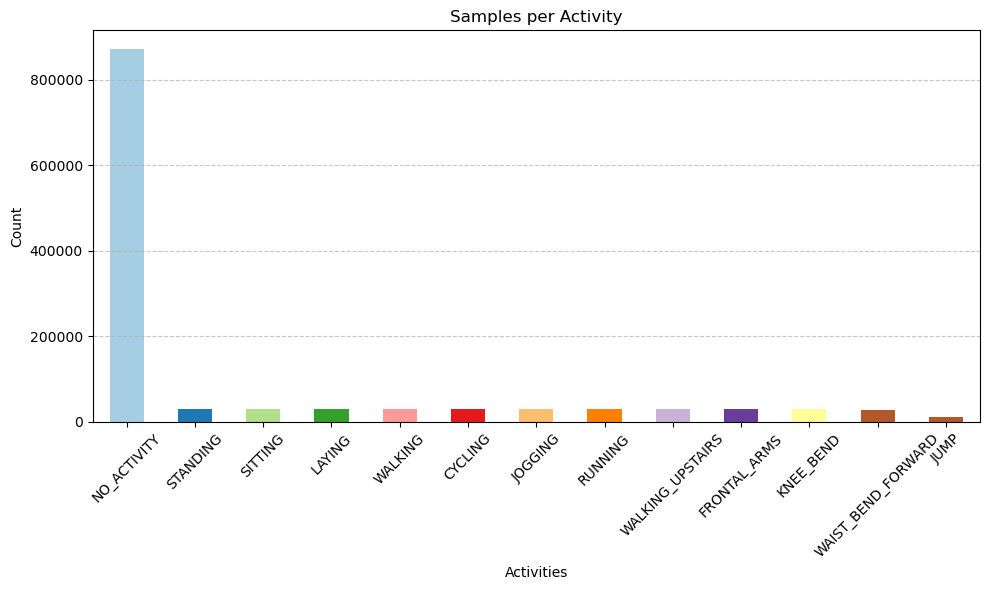

In [31]:
activity_counts = df_mhealth['activity_id'].map(activity_mapping).value_counts()

# Determine the number of unique activities
num_activities = len(activity_counts)

colors = plt.cm.Paired(range(num_activities))

# Now, we can create a bar plot using matplotlib with the specified colors
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
activity_counts.plot(kind='bar', color=colors)
plt.title('Samples per Activity')
plt.xlabel('Activities')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [32]:
#save for comparison purposes
df_before = df_mhealth.copy()

#resampling
null_act = df_mhealth[df_mhealth['activity_id'] == 0]
other_act = df_mhealth[df_mhealth['activity_id'] != 0]
num_samples_per_subject = 30720 // len(df_mhealth['subject_id'].unique())

resampled_null_act = pd.concat([
    null_act[null_act['subject_id'] == subject_id].sample(n=num_samples_per_subject, replace=True, random_state=1)
    for subject_id in df_mhealth['subject_id'].unique()
])

df_mhealth = pd.concat([resampled_null_act, other_act])
df_mhealth['activity_id'].value_counts()

activity_id
0     30720
1     30720
2     30720
3     30720
4     30720
9     30720
10    30720
11    30720
5     30720
7     29441
8     29337
6     28315
12    10342
Name: count, dtype: int64

#### Visual Representation of Activities per Subject: Before & After Resamping

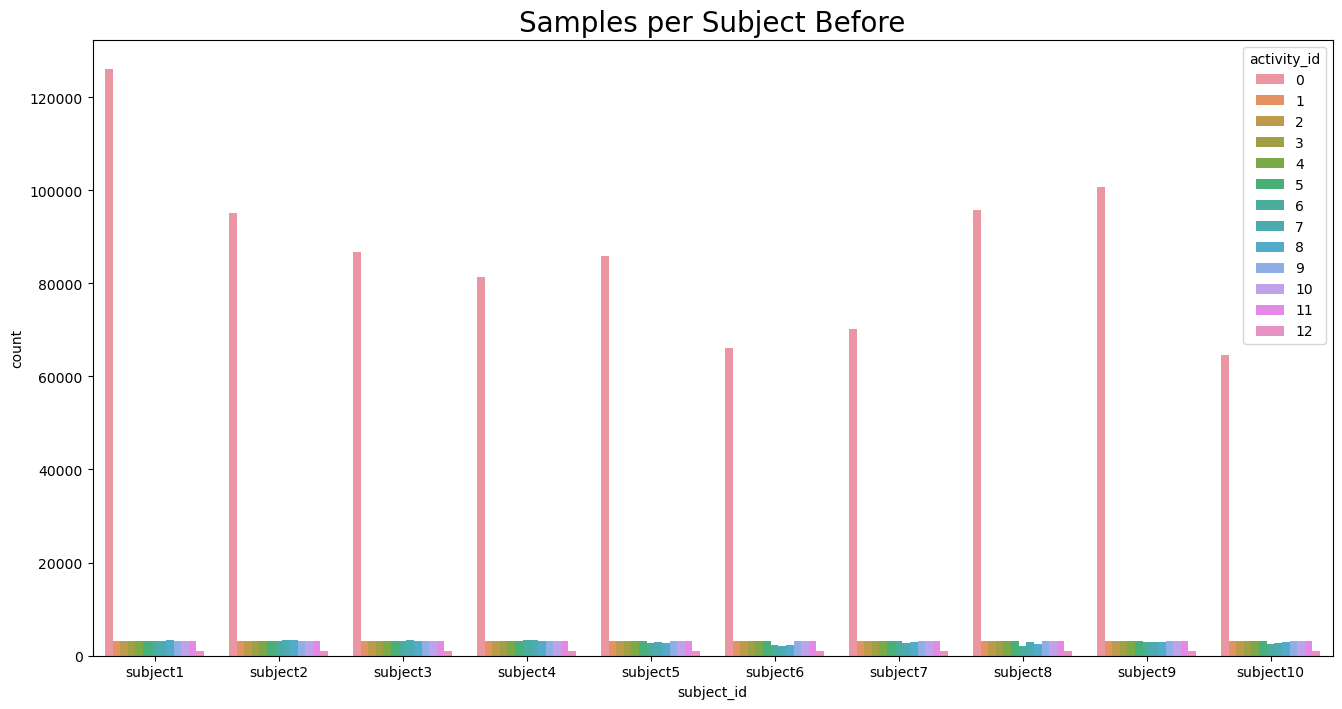

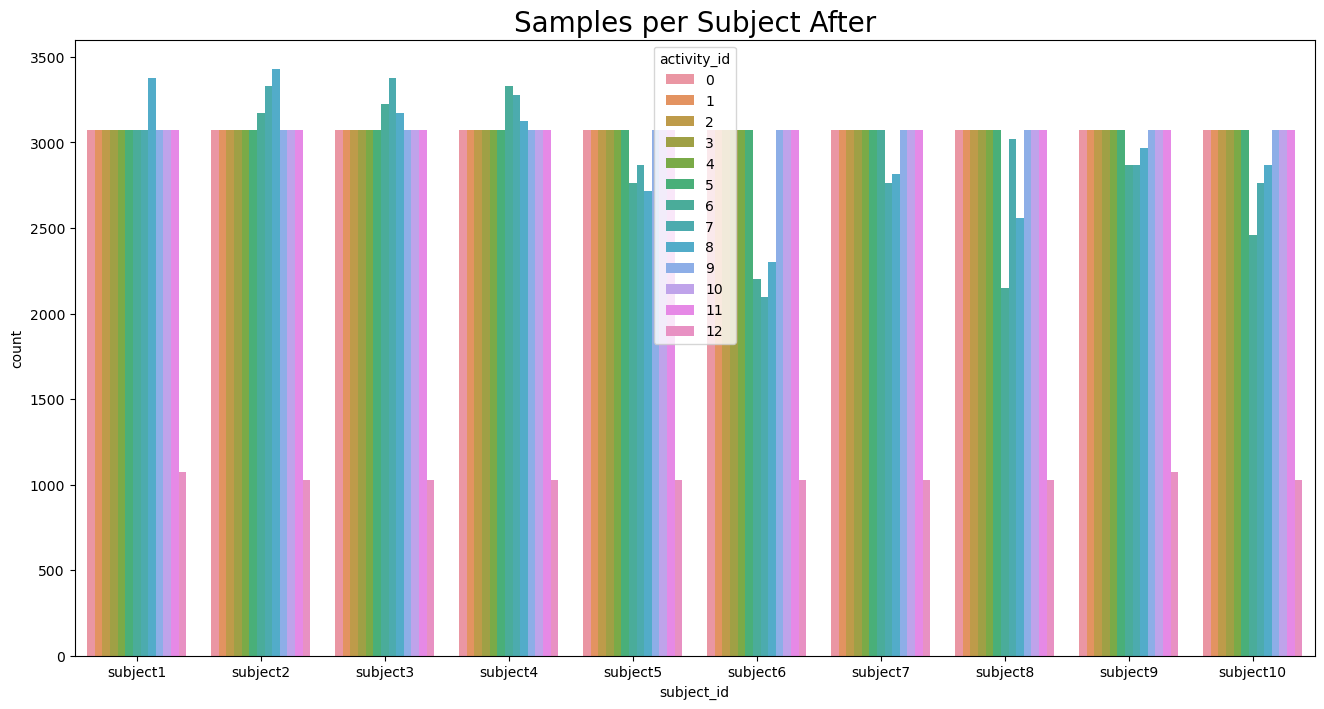

In [33]:
plt.figure(figsize=(16,8))
plt.title('Samples per Subject Before', fontsize=20)
sns.countplot(x='subject_id',hue='activity_id', data = df_before)
plt.show()

plt.figure(figsize=(16,8))
plt.title('Samples per Subject After', fontsize=20)
sns.countplot(x='subject_id',hue='activity_id', data = df_mhealth)
plt.show()

#### Acceleration analysis

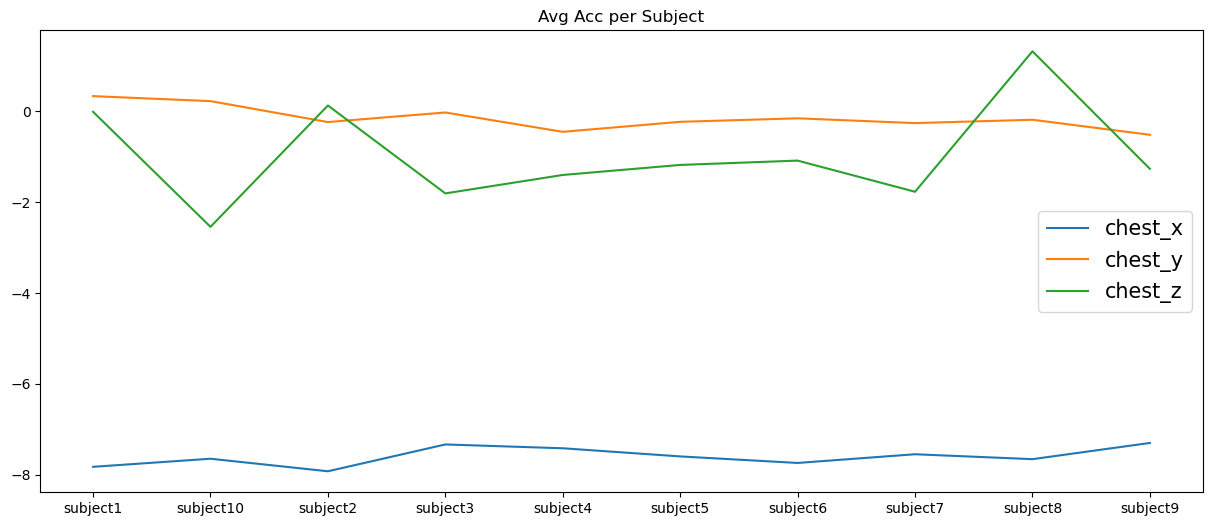

In [41]:
result_id = df_mhealth.drop(['activity_id','activity_name'], axis=1).groupby(['subject_id']).mean().reset_index()
samples = pd.DataFrame()
samples['chest_x'] = result_id['acc_ch_x']
samples['chest_y'] = result_id['acc_ch_y']
samples['chest_z'] = result_id['acc_ch_z']
ax = samples.plot(kind='line', figsize=(15,6), title='Avg Acc per Subject')
ax.set_xticks(np.arange(len(samples)))
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 15)
c = ax.set_xticks(np.arange(len(samples)))

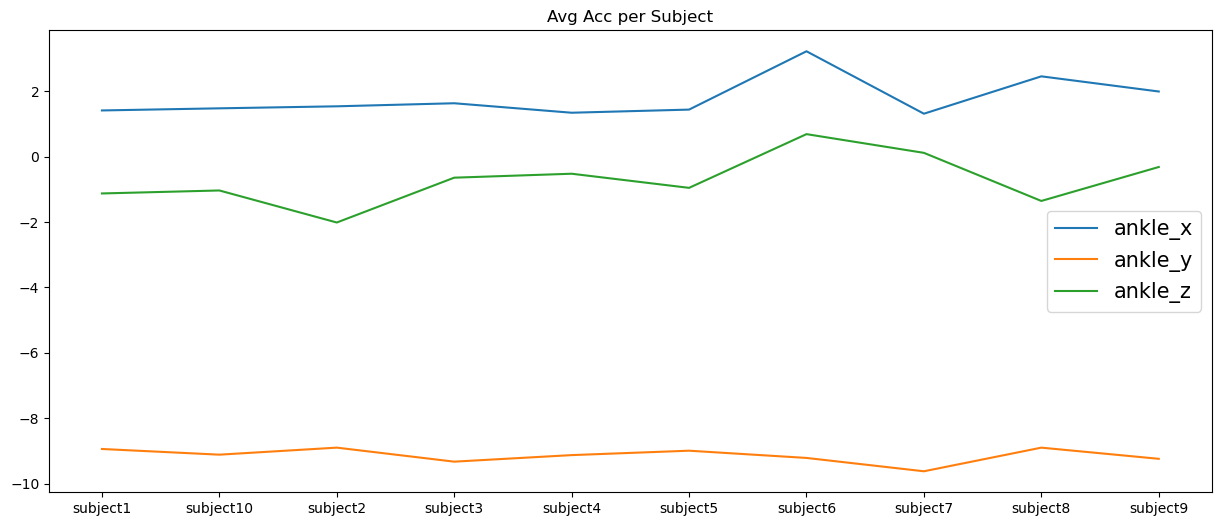

In [42]:
result_id = df_mhealth.drop(['activity_id','activity_name'], axis=1).groupby(['subject_id']).mean().reset_index()
samples = pd.DataFrame()
samples['ankle_x'] = result_id['acc_la_x']
samples['ankle_y'] = result_id['acc_la_y']
samples['ankle_z'] = result_id['acc_la_z']
ax = samples.plot(kind='line', figsize=(15,6), title='Avg Acc per Subject')
ax.set_xticks(np.arange(len(samples)))
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 15)
c = ax.set_xticks(np.arange(len(samples)))

#### Investigating which columns are mostly correlated with Activity

In [48]:
numerical_columns = df_mhealth.select_dtypes(include='number').columns

# Calculate Pearson correlation coefficients
correlation_results = {}
for col in numerical_columns:
    correlation_results[col] = df_mhealth[col].corr(df_mhealth['activity_id'])

# Sort the results by correlation coefficient magnitude
sorted_correlation_results = sorted(correlation_results.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the top correlated columns
top_correlated_columns = sorted_correlation_results[1:10]  # Adjust the number of top correlated columns to display
for col, corr in top_correlated_columns:
    print(f"{col}: Correlation = {corr}")

acc_ch_z: Correlation = -0.3437347443485289
gyr_la_z: Correlation = -0.28189341339240886
acc_la_z: Correlation = -0.28143780625798426
acc_ch_y: Correlation = 0.18120420566639867
acc_la_y: Correlation = -0.17357851535802368
gyr_la_y: Correlation = -0.13275906850334956
acc_rw_z: Correlation = -0.11504920457440157
gyr_rw_z: Correlation = 0.07709955700927201
mag_rw_y: Correlation = 0.0754106050135653


#### Investigating the highest correlated feature acc_ch_z.
##### Most activities are separated clearly on the y-axis. However, more similar activities (eg. running, jogging) are not completely separable to less similar ones (eg. no activity). Hence, the relatively low correlation of "only" 34.3%

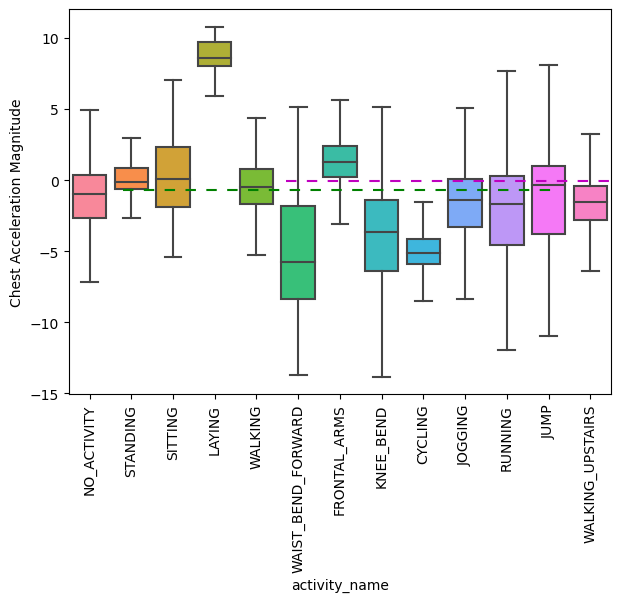

In [52]:
plt.figure(figsize=(7,5))
df_mhealth['activity_name'] = df_mhealth['activity_id'].map(activity_mapping)
sns.boxplot(x='activity_name', y='acc_ch_z',data=df_mhealth, showfliers=False, saturation=1)
plt.ylabel('Chest Acceleration Magnitude')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

#### Correlations between features

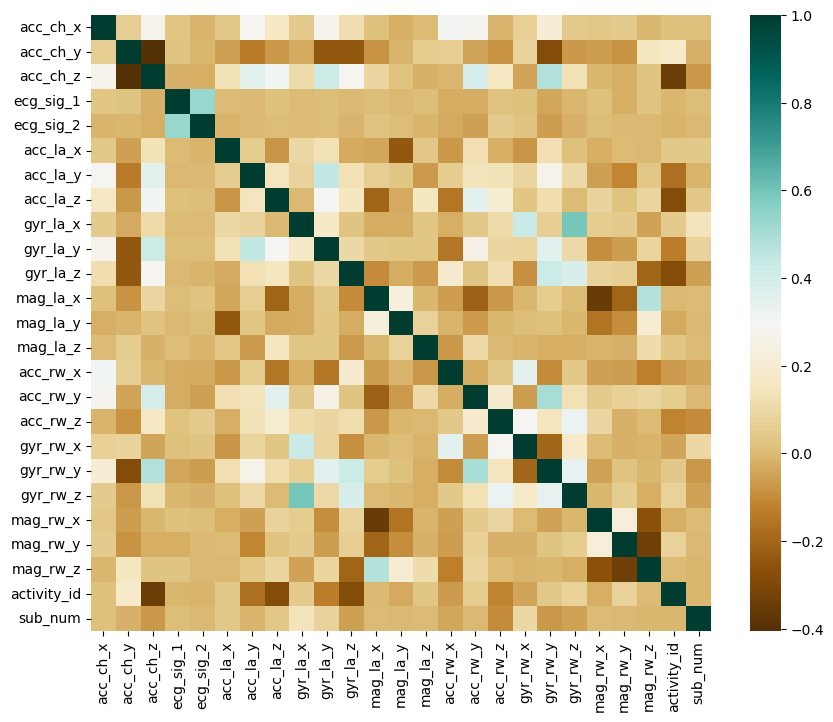

In [55]:
df_mhealth['sub_num'] = df_mhealth['subject_id'].str.extract(r'(\d+)')
df_mhealth['sub_num'] = df_mhealth['sub_num'].astype(int)
tdf = df_mhealth.drop(['subject_id', 'activity_name'], axis=1)
df_corr = tdf.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=bool), cmap = "BrBG",ax=ax)
plt.show()

In [56]:
top_corr_unique = df_corr.unstack().sort_values(ascending=False).drop_duplicates()
top_corr_unique = top_corr_unique[top_corr_unique != 1]
top_corr_unique = top_corr_unique.head(5) 

print("Top 5 most correlated features:")
for (feature1, feature2), correlation in top_corr_unique.items():
    print(f"{feature1} and {feature2}: {correlation}")

Top 5 most correlated features:
gyr_la_x and gyr_rw_z: 0.5984557143249529
ecg_sig_1 and ecg_sig_2: 0.5332708772286381
gyr_rw_y and acc_rw_y: 0.49960387847305543
acc_ch_z and gyr_rw_y: 0.47865198733192377
mag_la_x and mag_rw_z: 0.473968422946981


### Analysis n:

In [5]:
# ...